<a href="https://colab.research.google.com/github/jhlopesalves/data-science-practice-notebook/blob/main/Python/data_manipulation/pandas/joining_data_with_pandas/joining_data_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging Data with Pandas

## Introduction

In real-world data analysis, information is rarely stored in a single monolithic table. Instead, data is typically distributed across multiple sources, each representing different aspects, entities, or time periods of the system under study. Combining these disparate tables - **merging** - is a foundational operation in data wrangling, much like performing SQL joins in a relational database. Effective merging allows you to enrich datasets, assemble complete records, and unlock the analytical power of relational thinking.

## The Essence of Merging

### What is a Merge (Join)?

A **merge** combines two or more tables (DataFrames) based on the values of one or more shared columns, called **keys**. This process is analogous to SQL joins, enabling you to bring together related information from separate sources.

### The Most Common Join: **Inner Join**

**Intuition:**  
An *inner join* retrieves only the rows that have matching key values in **both** DataFrames. It acts as a filter - retaining only those records for which the relationship exists in all datasets involved.

If you imagine each table as a circle in a Venn diagram, an inner join corresponds to the overlapping region: only values present in both circles are included in the result.<br>
This is the default behaviour in Pandas' `merge` function.

**When to use:**  
- When you want to analyse only the “shared universe” of your datasets - i.e., where data is available in all sources.

### Syntax: `pd.merge()`

The principal function for table merging in Pandas is `pd.merge()`. The basic usage is:

```python
import pandas as pd

merged_df = pd.merge(
    left=table1,
    right=table2,
    on="key_column"        # or on=["key1", "key2"] for composite keys
)
```
By default, this performs an **inner join** on the specified key(s).


### Example: Inner Join with a Common Key

Suppose you have two DataFrames, each with a `"user_id"` column representing the entity to join on:

```python
merged_df = pd.merge(left=users, right=purchases, on="user_id")
```
- Only users with purchase records - and vice versa - are included in the result.

### Handling Overlapping Column Names: The `suffixes` Argument

When both tables have columns with the same name (apart from the join key), Pandas automatically appends suffixes to distinguish them. You can customise these using the `suffixes` argument:

```python
merged_df = pd.merge(
    left=table1,
    right=table2,
    on="id",
    suffixes=("_left", "_right")
)
```
This ensures the resulting DataFrame remains unambiguous and self-explanatory.

## Best Practices

1) **Explicit key columns:** Always specify the `on=` argument to avoid subtle merge errors, especially when column names are similar but not identical.
2) **Review join types:** Inner joins are safe and conservative, but for broader analyses, consider left, right, or outer joins (see Pandas documentation).
3) **Inspect results:** Always check the shape and sample rows of your merged DataFrame (`.shape`, `.head()`) to ensure correctness.
4) **Column name hygiene:** Use `suffixes` to manage naming collisions for maximum interpretability.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Clone the repository without downloading any files yet (--no-checkout)
# The repository is placed in a temporary folder named 'temp_repo'.
print("Cloning repository structure...")
!git clone --no-checkout --depth 1 https://github.com/jhlopesalves/data-science-practice-notebook.git temp_repo

# Navigate into the temporary repository directory
%cd temp_repo

# 3. Set up sparse checkout to target ONLY the folder you need.
# This is the modern, direct syntax for this command.
print("Setting sparse checkout to the target directory...")
!git sparse-checkout set Python/data_manipulation/pandas/joining_data_with_pandas/data

# Now, pull the actual files for only that specified folder
print("Downloading the specified folder...")
!git checkout

# The folder now exists inside the temporary directory.
# Move it from its nested path up to your main '/content/' directory.
print("Moving 'data' folder to the main directory...")
!mv Python/data_manipulation/pandas/joining_data_with_pandas/data /content/data

# Navigate back out of the temporary directory
%cd ..

# Remove the temporary folder and all its contents
print("Cleaning up temporary files...")
!rm -rf temp_repo

# Verify the final result. You should now see only the 'data/' folder.
print("\nVerification complete. Final directory contents:")
!ls -F

Cloning repository structure...
Cloning into 'temp_repo'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 83 (delta 3), reused 70 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (83/83), 15.23 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/temp_repo
Setting sparse checkout to the target directory...
Your branch is up to date with 'origin/main'.
Moving 'data' folder to the main directory...
/content
Cleaning up temporary files...

Verification complete. Final directory contents:
data/  sample_data/


In [3]:
wards = pd.read_pickle("data/ward.p")
census = pd.read_pickle("data/census.p")

In [4]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [5]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [6]:
wards_census = wards.merge(census, on="ward")
display(wards_census.head())

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [7]:
print(wards_census.columns)

Index(['ward', 'alderman', 'address_x', 'zip_x', 'pop_2000', 'pop_2010',
       'change', 'address_y', 'zip_y'],
      dtype='object')


In [8]:
wards_census = wards.merge(census, on="ward", suffixes=("_ward", "_cen"))
display(wards_census.head())

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [9]:
print(wards_census.shape)

(50, 9)


### What column to merge on?
Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called `taxi_owners`, with info about the taxi cab company owners, and one is called `taxi_veh`, with info about each taxi cab vehicle. Both the `taxi_owners` and `taxi_veh` tables have been loaded for you to explore.

Choose the column you would use to merge the two tables on using the `.merge()` method.

In [10]:
# Load the datasets taxi_owners and taxi_veh
taxi_veh = pd.read_pickle("data/taxi_vehicles.p")
taxi_owners = pd.read_pickle("data/taxi_owners.p")

In [11]:
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [12]:
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


### Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the vid column. You can then use the merged table along with the `.value_counts()` method to find the most common fuel_type.

In [13]:
# Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.
# Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid", suffixes=("_own","_veh"))
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [14]:
# Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.
print(taxi_own_veh["fuel_type"].value_counts)

<bound method IndexOpsMixin.value_counts of 0         HYBRID
1       GASOLINE
2       GASOLINE
3         HYBRID
4       GASOLINE
          ...   
3514      HYBRID
3515      HYBRID
3516      HYBRID
3517      HYBRID
3518      HYBRID
Name: fuel_type, Length: 3519, dtype: object>


### Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables.

In [15]:
# Merge wards and census on the ward column and save the result to wards_census.
ward_census = wards.merge(census, on="ward")
ward_census


,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637
5,6,Roderick T. Sawyer,8001 S. MARTIN LUTHER KING DRIVE,60619,54989,52341,-5%,150 WEST 74TH STREET,60636
6,7,Gregory I. Mitchell,2249 EAST 95TH STREET,60617,54593,51581,-6%,8549 SOUTH OGLESBY AVENUE,60617
7,8,Michelle A. Harris,8539 SOUTH COTTAGE GROVE AVENUE,60619,54039,51687,-4%,1346-1352 EAST 75TH STREET,60649
8,9,Anthony A. Beale,34 EAST 112TH PLACE,60628,52008,51519,-1%,11039-11059 SOUTH WENTWORTH AVENUE,60628
9,10,Susan Sadlowski Garza,10500 SOUTH EWING AVENUE,60617,56613,51535,-9%,10534 SOUTH AVENUE F,46394


# Merging Multiple DataFrames

In practical data analysis, you frequently encounter scenarios where data is distributed across more than two tables—perhaps different files for different years, separate tables for related entities, or multiple sources tracking overlapping phenomena. The ability to **merge multiple DataFrames** is essential for building a unified, coherent dataset from fragmented sources. This task, while conceptually an extension of pairwise merging, introduces new technical and organisational considerations.

This section presents a rigorous and pedagogical approach to merging more than two DataFrames in Pandas, emphasising underlying principles, technical best practices, and clear strategies for complex real-world workflows.

## Why Merge Multiple Tables?

**Normalised data:** Well-structured datasets are often “normalised,” with each table focusing on a single entity or relationship (e.g., users, transactions, products). <br>
**Incremental enrichment:** You may need to successively enrich a “core” dataset by merging in supplementary information (demographics, geography, transactions, etc.).<br>
**Time series and partitioned data:** Data split by year, month, or region often arrives as multiple files/tables requiring consolidation.<br>
**Integrating data from multiple systems:** Merging is required to assemble a holistic view from various sources or platforms.

## Principles and Theory: Merging Beyond Two Tables

Theoretically, a **multi-way merge** can be decomposed into a sequence of binary (pairwise) merges. The result of each merge serves as the left table in the next merge, and so on.  
However, practical complexities arise:
**Consistent join keys:** All merges must use compatible keys; mismatched keys lead to data loss or duplication.<br>
**Naming collisions:** Overlapping column names across tables require explicit disambiguation via `suffixes`.<br>
**Data loss:** Each inner join restricts the dataset to rows common to all merged tables; outer joins preserve more data but may introduce missing values.

## Single Merge vs. Multiple Merges

### Single (Pairwise) Merge

```python
merged = pd.merge(table1, table2, on="id")
```
- Simple, clear, and effective when you only need to combine two tables.

### Merging Multiple Tables: Stepwise Approach

To merge three or more tables, you typically proceed recursively:

```python
merged = pd.merge(table1, table2, on="id", suffixes=("_t1", "_t2"))
merged = pd.merge(merged, table3, on="id", suffixes=("", "_t3"))
```

Each call combines the result of the previous merge with the next table, one at a time.

### Example: Merging Multiple Tables with Composite Keys and Suffixes

Suppose you have several tables sharing composite keys (multiple columns), and some columns overlap in name:

```python
merged = pd.merge(
    table1,
    table2,
    on=["user_id", "date"],
    suffixes=("_t1", "_t2")
)
merged = pd.merge(
    merged,
    table3,
    on=["user_id", "date"],
    suffixes=("", "_t3")
)
```
- **Composite keys:** Use `on=[...]` to specify all join columns.
- **Suffixes:** Avoid naming collisions as each table is added.

## Chaining `.merge()` for Multiple DataFrames

When merging more than two DataFrames that all share the same join key(s), Pandas allows you to **chain** `.merge()` calls. This produces concise, readable code and maintains clarity about the order and logic of each join.

### Example: Merging Three or More Tables

#### Merging Three Tables

```python
merged = df1.merge(df2, on="col") \
            .merge(df3, on="col")
```
- The result of the first merge (`df1` with `df2`) is merged immediately with `df3` on the same key.

#### Merging Four Tables

```python
merged = df1.merge(df2, on="col") \
            .merge(df3, on="col") \
            .merge(df4, on="col")
```
- The process is associative and left-to-right:  
  `(((df1 + df2) + df3) + df4)`

#### Merging Five or More Tables

```python
merged = df1.merge(df2, on="col") \
            .merge(df3, on="col") \
            .merge(df4, on="col") \
            .merge(df5, on="col")
```
- Each additional table is merged into the accumulating result.

### Key Points and Best Practices

1) **Consistent join key:** All tables must share the same key(s). For composite keys, use `on=["col1", "col2"]`.
2) **Suffixes for name collisions:** If non-key columns have the same names, manage them with `suffixes` in each call to avoid ambiguity.
3) **Join type:** By default, `.merge()` performs an inner join. Specify `how="left"` (or `"outer"`, etc.) if needed for your logic.
4) **Readability:** For many tables or programmatic merges, consider using a loop or `functools.reduce()` for even greater generality and maintainability.

### Programmatic Merging with a Loop

If you have a list of DataFrames to merge:

```python
from functools import reduce

merged = reduce(lambda left, right: left.merge(right, on="col"), [df1, df2, df3, df4, df5])
```
This pattern is particularly useful when the number of tables is not known in advance (e.g., reading from a directory of CSV files).


### Advanced: Different Join Keys and Suffixes

If each merge uses different keys or needs custom suffixes, chain explicitly:

```python
merged = df1.merge(df2, on="key1", suffixes=("_a", "_b")) \
            .merge(df3, on="key2", suffixes=("", "_c")) \
            .merge(df4, on="key3", suffixes=("", "_d"))
```



In [16]:
licenses = pd.read_pickle("data/licenses.p")
biz_owners = pd.read_pickle("data/business_owners.p")

In [17]:
display(licenses.head())
display(licenses.shape)

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


(10000, 6)

In [18]:
display(biz_owners.head())
display(biz_owners.shape)

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


(21352, 4)

In [19]:
ward_licenses = wards.merge(licenses, on="ward", suffixes=("_ward", "_lic"))
display(ward_licenses.head())

,ward,alderman,address_ward,zip_ward,account,aid,business,address_lic,zip_lic
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


### One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

In [20]:
# Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
licenses_owners = licenses.merge(biz_owners, on="account")

In [21]:
# Group the licenses_owners dataframe by the 'title' column to analyze business owner titles
# Use the agg() function with a dictionary to specify aggregation operations for specific columns
# The dictionary format is: {'column_name': 'aggregation_function'}
counted_df = licenses_owners.groupby("title").agg({"account":"count"})
counted_df

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134


In [22]:
# Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
sorted_df = counted_df.sort_values(by="account", ascending=False)
display(sorted_df.head())

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


### Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (`station_name == 'Wilson'`) when riding Chicago's public transportation system on weekdays (`day_type == 'Weekday'`) in July (`month == 7`). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

In [23]:
cal = pd.read_pickle("data/cta_calendar.p")
ridership = pd.read_pickle("data/cta_ridership.p")
stations = pd.read_pickle("data/stations.p")

In [24]:
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [25]:
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [26]:
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [27]:
# Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.
ridership_cal = ridership.merge(cal, on=["year", "month", "day"])
ridership_cal

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40010,2019,1,2,1457,Weekday
2,40010,2019,1,3,1543,Weekday
3,40010,2019,1,4,1621,Weekday
4,40010,2019,1,5,719,Saturday
...,...,...,...,...,...,...
3280,41660,2019,12,27,13898,Weekday
3281,41660,2019,12,28,9485,Saturday
3282,41660,2019,12,29,7581,Sunday/Holiday
3283,41660,2019,12,30,15332,Weekday


In [28]:
# Extend the previous merge to three tables by also merging the stations table.
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']).merge(stations, on="station_id")
ridership_cal_stations

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"
...,...,...,...,...,...,...,...,...
3280,41660,2019,12,27,13898,Weekday,Lake/State,"(41.884809, -87.627813)"
3281,41660,2019,12,28,9485,Saturday,Lake/State,"(41.884809, -87.627813)"
3282,41660,2019,12,29,7581,Sunday/Holiday,Lake/State,"(41.884809, -87.627813)"
3283,41660,2019,12,30,15332,Weekday,Lake/State,"(41.884809, -87.627813)"


In [29]:
# Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.
filter_criteria  = ((ridership_cal_stations["month"] == 7)
                    & (ridership_cal_stations["day_type"] == "Weekday")
                    & (ridership_cal_stations["station_name"] == "Wilson"))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, "rides"].sum())

140005


### Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.

In [30]:
zip_demo = pd.read_pickle("data/zip_demo.p")

In [31]:
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [32]:
# Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
licenses_zip_ward = licenses.merge(zip_demo, on="zip").merge(wards, on="ward")
licenses_zip_ward.head()

,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,50164,Susan Sadlowski Garza,10500 SOUTH EWING AVENUE,60617
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,42335,Edward M. Burke,2650 WEST 51ST STREET,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,33959,George Cardenas,3476 SOUTH ARCHER AVENUE,60608
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,79565,Tom Tunney,3223 NORTH SHEFFIELD AVENUE,60657


In [33]:
# Group the results of the three merged tables by the column alderman and find the median income.
display(licenses_zip_ward.groupby("alderman").agg({"income":"median"}))


,income
alderman,
Ameya Pawar,66246.0
Anthony A. Beale,38206.0
Anthony V. Napolitano,82226.0
Ariel E. Reyboras,41307.0
Brendan Reilly,110215.0
Brian Hopkins,87143.0
Carlos Ramirez-Rosa,66246.0
Carrie M. Austin,38206.0
Chris Taliaferro,55566.0


### One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The `land_use` table has info on the percentage of vacant land by city ward. The `census` table has population by ward, and the `licenses` table lists businesses by ward.

In [34]:
land_use = pd.read_pickle("data/land_use.p")
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [35]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [36]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [37]:
# Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic.
land_cen_lic = land_use.merge(census, on="ward").merge(licenses, on="ward", suffixes=("_cen", "_lic"))
land_cen_lic.head()

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [38]:
# Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.
# The as_index=False parameter keeps the grouping columns as regular columns instead of making them the index
# The agg() function applies the count aggregation to the 'account' column
pop_vac_lic = land_cen_lic.groupby(["ward", "pop_2010", "vacant"], as_index=False).agg({"account":"count"})
pop_vac_lic.head()

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101


In [39]:
# Sort pop_vac_lic by vacant, account, an pop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=["vacant", "account", "pop_2010"], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
display(sorted_pop_vac_lic.head())

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


# Left Join

## Overview and Intuition

In relational data analysis, joining tables is the act of combining records from two or more tables based on shared key values. While the **inner join** includes only rows where keys exist in **both** tables, the **left join** (also called a *left outer join*) is more inclusive: it returns all rows from the **left** table and fills in matching data from the **right** table - using missing values (`NaN`) where no match exists.

**Intuitive Principle:**  

 The **left table** is "guaranteed" - all its records are preserved, regardless of whether there is corresponding data in the right table. <br>
 The **right table** only contributes data where the join key matches the left. <br>
 If you imagine a Venn diagram, a left join corresponds to the entirety of the left circle, plus any overlapping data from the right.<br>

**Why use a left join?**<br>
1) To **preserve the full set** of observations from a main dataset, adding supplementary data where available. <br>
2) To identify **missing or unmatched** entries in a secondary dataset. <br>
3) To annotate, enrich, or audit a dataset without losing the original structure or dropping any data.


## Comparing Inner Join and Left Join

| Join Type   | What is included?                                                         |
|-------------|---------------------------------------------------------------------------|
| Inner Join  | Only rows where the join key exists in **both** left and right tables      |
| Left Join   | **All** rows from left table, plus matching data from right (or NaN)      |


## Example: Left Join in Action

Suppose you have:

**Left Table**  
| user_id | name   |
|---------|--------|
| 1       | Alice  |
| 2       | Bob    |
| 3       | Carlos |

**Right Table**  
| user_id | purchase_amount |
|---------|----------------|
| 1       | 100            |
| 2       | 50             |

**Left Join Result**  
| user_id | name   | purchase_amount |
|---------|--------|----------------|
| 1       | Alice  | 100            |
| 2       | Bob    | 50             |
| 3       | Carlos | NaN            |

Carlos is preserved in the result, even though he has no corresponding record in the right table. <br>


## Pandas Syntax for a Left Join

The key argument is `how="left"` in `pd.merge()`:

```python
import pandas as pd

merged = pd.merge(
    left=left_table,
    right=right_table,
    on="user_id",
    how="left"
)
```
You may also use composite keys with `on=["key1", "key2"]`. <br>
Columns with no matching right-side value will be filled with `NaN`.


## Best Practices

1) Always use `how="left"` when you want to preserve all rows from the primary (left) dataset.<br>
2) Inspect the result for unmatched rows (those with `NaN` in right table columns).<br>
3) Left joins are especially useful for feature engineering, data enrichment, and identifying gaps between datasets.

In [40]:
movies = pd.read_pickle("data/movies.p")
movies = movies.rename(columns={"title":"original_title"})

In [41]:
display(movies.head())
display(movies.shape)

,id,original_title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


(4803, 4)

In [42]:
taglines = pd.read_pickle("data/taglines.p")
display(taglines.head())
display(taglines.shape)

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


(3955, 2)

In [43]:
# Merge with left join
movie_taglines = movies.merge(taglines, on="id", how="left")
display(movie_taglines.head())
display(movie_taglines.shape)

,id,original_title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


(4803, 5)

In [44]:
financials = pd.read_pickle("data/financials.p")
display(financials.head())
display(financials.shape)

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


(3229, 3)

In [45]:
# Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.
movies_financials = movies.merge(financials, on="id", how="left")
display(movies_financials.head())
display(movies_financials.shape)

,id,original_title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


(4803, 6)

In [46]:
# Count the number of rows in movies_financials with a null value in the budget column.
number_of_missing_fin = movies_financials["budget"].isna().sum()
# Print the number of movies missing financials
print(number_of_missing_fin)

1574


# Other Joins: Right Join and Outer Join

Beyond inner and left joins, Pandas supports **right join** and **outer join**. Each join type serves a distinct analytical need. Mastering them gives you full control over how records are included or excluded when merging multiple data sources.

## Right Join

### Intuition and Principle

A **right join** (or *right outer join*) preserves all rows from the **right** table and merges matching rows from the **left** table. Where there is no corresponding left record, missing values (`NaN`) fill in.

The **right table** is "guaranteed": every row is kept. <br>
The **left table** only contributes rows with a matching key.

**Use cases:**  
1) When the right table is your “master list” or reference.
2) When you wish to annotate every entry in the right table with information from the left.

### Example: Right Join in Action

**Left Table**

| id | name   |
|----|--------|
| 1  | Alice  |
| 2  | Bob    |

**Right Table**

| id | score |
|----|-------|
| 1  | 95    |
| 2  | 88    |
| 3  | 77    |

**Right Join Result**

| id | name   | score |
|----|--------|-------|
| 1  | Alice  | 95    |
| 2  | Bob    | 88    |
| 3  | NaN    | 77    |

Note how id=3 appears in the result, even though it is not present in the left table.


### Pandas Syntax: Right Join

```python
import pandas as pd

merged = pd.merge(
    left=left_table,
    right=right_table,
    on="id",
    how="right"
)
```
For different key names, use `left_on="left_id", right_on="right_id"`.


## Outer Join

### Intuition and Principle

An **outer join** (also called *full outer join*) preserves all rows from **both** tables, matching them where possible by key. Where no match exists, missing values (`NaN`) fill in from the missing side.

Think of the union of both tables’ keys. <br>
No data is lost—every unique key from either table appears in the result.

**Use cases:**  
1) When you want a comprehensive dataset, showing all records and explicitly displaying gaps.
2) For comparing datasets, auditing coverage, or combining partially overlapping sources.


### Example: Outer Join in Action

**Left Table**

| id | name   |
|----|--------|
| 1  | Alice  |
| 2  | Bob    |

**Right Table**

| id | score |
|----|-------|
| 2  | 88    |
| 3  | 77    |

**Outer Join Result**

| id | name   | score |
|----|--------|-------|
| 1  | Alice  | NaN   |
| 2  | Bob    | 88    |
| 3  | NaN    | 77    |

All keys from both tables are present, with `NaN` where there is no match.


### Pandas Syntax: Outer Join with Suffixes

```python
merged = pd.merge(
    left=left_table,
    right=right_table,
    left_on="left_id",
    right_on="right_id",
    how="outer",
    suffixes=("_left", "_right")
)
```
- `left_on` and `right_on` specify different key columns if names differ.
- `how="outer"` signals a full join.
- `suffixes` resolve naming collisions for non-key columns present in both tables.

## Join Types

| Join Type    | Includes...                                      | When to Use                                 |
|--------------|--------------------------------------------------|---------------------------------------------|
| inner        | Only keys present in **both** tables             | Intersection/overlap analysis               |
| left         | All keys from **left** table                     | Enrich/annotate a primary dataset           |
| right        | All keys from **right** table                    | Annotate or audit against reference table   |
| outer        | All keys from **either** table                   | Full audit, gap analysis, combining sources |



In [47]:
movie_to_genres = pd.read_pickle("data/movie_to_genres.p")
display(movie_to_genres.head())
display(movie_to_genres.shape)

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


(12160, 2)

In [48]:
# Looking at data
tv_genre = movie_to_genres[movie_to_genres["genre"] == "TV Movie"]
display(tv_genre)

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
10835,158150,TV Movie
11096,205321,TV Movie
11282,231617,TV Movie


In [49]:
# Filtering the data to find TV Movie genre records
# Using boolean indexing to create a mask for filtering
m = movie_to_genres["genre"] == "TV Movie"
tv_genre = movie_to_genres[m]
display(tv_genre)

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
10835,158150,TV Movie
11096,205321,TV Movie
11282,231617,TV Movie


In [50]:
# Merge with right join
# This preserves all TV Movie records from tv_genre (right table) and adds movie info where available
# Using different column names for the join: 'id' from movies and 'movie_id' from tv_genre
tv_movies = movies.merge(tv_genre, how="right",
                         left_on="id", right_on="movie_id")
display(tv_movies.head())

,id,original_title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie


In [51]:
m = movie_to_genres["genre"] == "Family"
family = movie_to_genres[m].head(3)
family

,movie_id,genre
5,12,Family
33,35,Family
111,105,Family


In [52]:
m = movie_to_genres["genre"] == "Comedy"
comedy = movie_to_genres[m].head(3)
comedy

,movie_id,genre
1,5,Comedy
7,13,Comedy
35,35,Comedy


In [53]:
family_comedy = family.merge(comedy, on="movie_id", how="outer",
                             suffixes=("_fam", "_com"))
display(family_comedy)

,movie_id,genre_fam,genre_com
0,5,NaN,Comedy
1,12,Family,NaN
2,13,NaN,Comedy
3,35,Family,Comedy
4,105,Family,NaN


### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [54]:
# Defining action_movies table
m = movie_to_genres["genre"] == "Action"
action_movies = movie_to_genres[m]

In [55]:
# Defining scifi_movies table
m = movie_to_genres["genre"] == "Science Fiction"
scifi_movies = movie_to_genres[m]

In [56]:
# Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how="right")
display(action_scifi)

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
...,...,...,...
530,335866,NaN,Science Fiction
531,347548,NaN,Science Fiction
532,360188,NaN,Science Fiction
533,367551,Action,Science Fiction


In [57]:
# Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how="right", suffixes=("_act", "_sci"))
display(action_scifi.head())

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [58]:
# From action_scifi, subset only the rows where the genre_act column is null.
scifi_only = action_scifi[action_scifi["genre_act"].isna()]

In [59]:
# Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.
movies_and_scifi_only = movies.merge(scifi_only, left_on="id", right_on="movie_id", how="inner")
display(movies_and_scifi_only)

,id,original_title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction
...,...,...,...,...,...,...,...
253,245703,Midnight Special,32.717853,2016-02-18,245703,NaN,Science Fiction
254,3509,A Scanner Darkly,26.093043,2006-05-25,3509,NaN,Science Fiction
255,42188,Never Let Me Go,30.983397,2010-09-15,42188,NaN,Science Fiction
256,18045,The Dark Hours,1.428483,2005-03-11,18045,NaN,Science Fiction


In [60]:
movies_to_genres = pd.read_pickle("data/movie_to_genres.p")
movies_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [61]:
pop_movies = movies.sort_values(by="popularity", ascending=False).head(10).rename(columns={"original_title":"title"})
pop_movies.head()

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13


In [62]:
# Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
genres_movies = movie_to_genres.merge(pop_movies, how="right", left_on="movie_id", right_on="id")
genres_movies.head()

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


In [63]:
# Group genres_movies by genre and count the number of id values.
genre_count = genres_movies.groupby("genre").agg({"id":"count"})
display(genre_count)

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


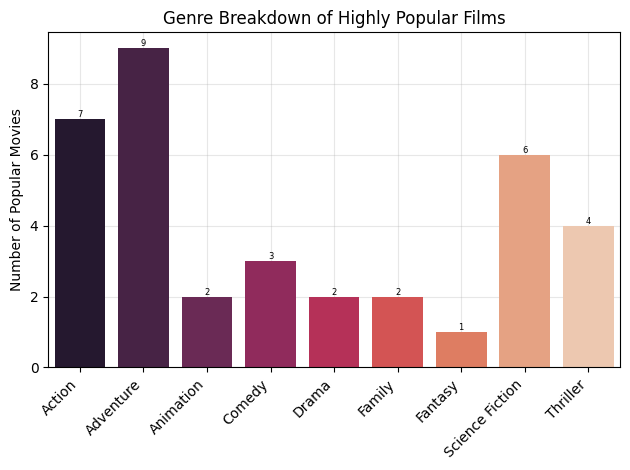

In [64]:
# Plot a bar chart of the genre_count
fig, ax = plt.subplots()

sns.barplot(data=genre_count, x=genre_count.index, y=genre_count["id"], palette="rocket", hue=genre_count.index)

ax.set(xlabel="", ylabel="Number of Popular Movies", title="Genre Breakdown of Highly Popular Films")

ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)
# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=6)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and `null` where they do not match, you can use it to find rows that do not have a match in the other table.

To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table must be called `iron_1_actors`, and Iron Man 2 table is called `iron_2_actors`.

In [65]:
casts = pd.read_pickle("data/casts.p")
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [66]:
casts_only = casts.drop(["movie_id", "cast_id", "gender"], axis=1)
casts_only.head()

,character,id,name
7,Jezebel,3122,Sammi Davis
8,Diana,3123,Amanda de Cadenet
9,Athena,3124,Valeria Golino
3,Elspeth,3125,Madonna
12,Eva,3126,Ione Skye


In [67]:
iron_1_actors = casts_only[casts_only["id"].isin([17857,   12052,    1229,   18288,   57451,   57452,    3223,
          9048,  173810,    6162,   15277,   12708,   40275,    2231,
         17200,  163671,   78299,   54809,  944830, 1209417,   95698,
       1209418,   62037,  183439,  109669,  104669, 1209419,  195442,
        142213, 1209702, 1209703,  183037, 1209704,  214951,  205362,
        203468,  939869, 1209705, 1209706, 1209707, 1209708, 1209709,
       1209710,  206423,  133121,  181895,   62843,  204606,  210842,
        205720, 1005698,    7624, 1209711,   90721,  169681, 1209712,
       1209713,  169642,   27031,   34544,  150669, 1209714, 1209715,
       1004624,  984619, 1209716, 1209717,  970218, 1209718, 1202546,
       1209719, 1209720, 1209721, 1209722, 1089759, 1096679, 1209723,
       1209724,   78434, 1209725, 1209726, 1209727, 1209728, 1209729,
       1209730, 1209731, 1429470])]

In [68]:
# Create iron_2_actors DataFrame
iron_2_actors = casts_only[casts_only["id"].isin([
    2295, 1245, 6807, 2231, 12052, 1896, 15277, 57451, 81364, 51072,
    113676, 3223, 52865, 21134, 9048, 6162, 73641, 14741, 1209714, 216601,
    1265248, 1265249, 1177850, 586090, 1228219, 40275, 1230885, 1265250,
    1079976, 7624, 1265251, 118755, 210292, 1265252, 57563, 95777, 81957,
    1265795, 997632, 1265796, 201883, 1265797, 1265798, 1003061, 1265799,
    1202543, 1265800, 1265801, 571240, 1265802, 108725, 1265803, 995348,
    1265804, 1265805, 1265806, 83274, 168925, 1265807, 98999, 1265808,
    1265809, 1265810, 1265811, 1265812, 1265813, 1265814, 1265815, 1078574,
    1265816, 1236642, 1231548, 1265817, 1265818, 1265819, 1225936, 97447,
    1265820, 1265821, 1265822, 1265823, 1265824, 1265825, 1265826, 193946,
    1265827, 201951, 1200895, 1200313, 101037, 1265828, 1265829, 1186481,
    1265830, 992389, 1265831, 208056, 1265832, 1265833, 223048, 1197358,
    1265834, 1265835, 1265836, 77824, 1197040, 1265837, 1265838, 1265839,
    92189, 1265840, 1265841, 1122811, 1205141, 1429470, 1213109
])]

In [69]:
display(iron_1_actors.head())
iron_1_actors.shape

,character,id,name
11,Branded Marine,95698,Kevin Foster
45,Boxing Fan (uncredited),1209723,Robert McMurrer
0,The Dude,1229,Jeff Bridges
17,Reese,34544,Joshua Harto
0,Dr. Mark Powell,1229,Jeff Bridges


(458, 3)

In [70]:
display(iron_2_actors.head())
iron_2_actors.shape

,character,id,name
1,Nola Rice,1245,Scarlett Johansson
12,Alma Jr. (Age 19),51072,Kate Mara
1,Charlotte,1245,Scarlett Johansson
20,Basher Tarr (uncredited),1896,Don Cheadle
9,Basher Tarr,1896,Don Cheadle


(547, 3)

In [71]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on='id', how="outer", suffixes=("_1", "_2"))
display(iron_1_and_2)
iron_1_and_2.shape

,character_1,id,name_1,character_2,name_2
0,The Dude,1229,Jeff Bridges,NaN,NaN
1,Dr. Mark Powell,1229,Jeff Bridges,NaN,NaN
2,Jack Lucas,1229,Jeff Bridges,NaN,NaN
3,Michael Faraday,1229,Jeff Bridges,NaN,NaN
4,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
...,...,...,...,...,...
8942,Dr. Taryl Jenkins (uncredited),1429470,Nick W. Nicholson,Reporter (uncredited),Nick W. Nicholson
8943,Dr. Taryl Jenkins (uncredited),1429470,Nick W. Nicholson,Stark Expo Attendee (uncredited),Nick W. Nicholson
8944,Dr. Taryl Jenkins (uncredited),1429470,Nick W. Nicholson,Saloon Guy (uncredited),Nick W. Nicholson
8945,Dr. Taryl Jenkins (uncredited),1429470,Nick W. Nicholson,White House Reporter (uncredited),Nick W. Nicholson


(8947, 5)

In [72]:
# Create an index that returns True if name_1 or name_2 are null, and False otherwise.
m = ((iron_1_and_2['name_1'].isna()) |
     (iron_1_and_2['name_2'].isna()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1    id        name_1 character_2 name_2
0                     The Dude  1229  Jeff Bridges         NaN    NaN
1              Dr. Mark Powell  1229  Jeff Bridges         NaN    NaN
2                   Jack Lucas  1229  Jeff Bridges         NaN    NaN
3              Michael Faraday  1229  Jeff Bridges         NaN    NaN
4  Obadiah Stane / Iron Monger  1229  Jeff Bridges         NaN    NaN


In [73]:
iron_1_and_2_merge = iron_1_actors.merge(iron_2_actors, how="outer")
display(iron_1_and_2_merge)
iron_1_and_2_merge.shape

,character,id,name
0,'Old and Lame' Show Attendee,81364,Olivia Munn
1,'Old and Lame' Show Attendee,142213,Nazanin Boniadi
2,'Wild Bill' Wharton,6807,Sam Rockwell
3,(voice),14741,Philippe Bergeron
4,10 Rings Gangster,1265250,Ali Khan
...,...,...,...
876,Zeus Carver,2231,Samuel L. Jackson
877,Zoe Tripp,51072,Kate Mara
878,Zog (voice),2231,Samuel L. Jackson
879,Zorianna Kit,90721,Zorianna Kit


(881, 3)

In [74]:
iron_1_and_2_merge.isna().sum()

,0
character,0
id,0
name,0


# Merging a Table to Itself

A **self-join** is the process of merging a table with itself. This operation is essential in scenarios where records in a dataset are hierarchically or sequentially related, or when modelling networks and graph-like structures. Self-joins are conceptually similar to ordinary joins, but both the left and right tables are the same DataFrame—often with different keys, enabling you to “look up” related records within the same dataset.

This section covers the motivation, best practices, and technical procedures for merging a table to itself using Pandas, with an emphasis on careful, readable code and robust handling of key relationships.

## Why Merge a Table to Itself?

Common real-world scenarios include:

- **Hierarchical relationships:**  
  For example, employee-manager, category-subcategory, or parent-child relationships in trees or organisational charts.
- **Sequential relationships:**  
  Linking records in a sequence, such as steps in a process, chapters in a book, or “next” and “previous” pointers in linked data.
- **Graph data:**  
  Exploring relationships such as friends-of-friends, network links, or reference chains.

Self-joins allow you to enrich each record with data from its “related” counterpart, using foreign keys or reference columns within the same table.


## Mechanics: The Self-Join in Pandas

To merge a table with itself, use `.merge()`—but specify **different keys** for the left and right:

```python
merged = df.merge(
    df,
    left_on="reference_column",
    right_on="id_column",
    suffixes=("_left", "_right")
)
```
 `left_on`: the key column(s) in the left (original) DataFrame.<br>
 `right_on`: the key column(s) in the right (copy) DataFrame.<br>
 `suffixes`: distinguishes columns from each “side” of the join for clarity.<br>

## Table Structure: Before and After Self-Join

**Original Table (single DataFrame):**

| id | reference | title  |
|----|-----------|--------|
| 1  | NaN       | Alpha  |
| 2  | 1         | Beta   |
| 3  | 2         | Gamma  |

**Self-Join Result (joined on reference = id):**

| id_left | reference | title_left | id_right | reference_right | title_right |
|---------|-----------|------------|----------|----------------|-------------|
| 2       | 1         | Beta       | 1        | NaN            | Alpha       |
| 3       | 2         | Gamma      | 2        | 1              | Beta        |

<br>
Each row in the result links a record to its “related” record (e.g., child to parent, sequel to original, etc.).


## Syntax: Merging a Table to Itself

### Standard Self-Join (Inner Join by Default)

```python
merged = df.merge(
    df,
    left_on="reference_column",
    right_on="id_column",
    suffixes=("_src", "_ref")
)
print(merged.head())
```

### Selecting Relevant Columns for Clarity

Often, you want to focus on specific columns from each side of the join:

```python
print(merged[["title_src", "title_ref"]].head())
```

### Left Self-Join

To preserve all records from the original table, use a **left join**:

```python
merged = df.merge(
    df,
    left_on="reference_column",
    right_on="id_column",
    how="left",
    suffixes=("_src", "_ref")
)
print(merged.head())
```
This ensures every row from the “source” table appears, even if there is no matching reference.


## When to Use Self-Joins

**Hierarchical relationships:** To reconstruct trees, look up parent records, or traverse levels of a hierarchy.<br>
**Sequential relationships:** To chain records (e.g., previous/next, sequels, chronological events).<br>
**Graph data:** To explore connections, paths, or adjacency in network-like datasets.<br>
**Data enrichment:** To annotate each row with properties of a related row within the same dataset.<br>


## Best Practices

- **Use explicit suffixes** to avoid ambiguity in column names.
- **Carefully specify keys**: Misaligned or missing keys may yield more or fewer rows than expected, or introduce incorrect relationships.
- **Inspect the result**: Check the merged shape, sample values, and use `.isna()` to detect unlinked cases.
- **Limit columns**: Select only the necessary columns from each “side” for clarity and performance.


In [75]:
sequels = pd.read_pickle("data/sequels.p")
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [76]:
original_sequels = sequels.merge(sequels, left_on="sequel", right_on="id", suffixes=("_org", "_seq"))

original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


In [77]:
original_sequels[["title_org", "title_seq"]].head()

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


In [78]:
original_sequels = sequels.merge(sequels, left_on="sequel", right_on="id", how="left", suffixes=("_org", "_seq"))

original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>


### Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [79]:
crews = pd.read_pickle("data/crews.p")
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [80]:
#To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.
crews_self_merged = crews.merge(crews, on="id", how="inner", suffixes=("_dir", "_crew"))
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [81]:
# Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.
boolean_filter = ((crews_self_merged["job_dir"] == "Director") & (crews_self_merged["job_crew"] != "Director"))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


## Merging on Indexes

In Pandas, the **index** (row labels) provides an additional axis for identifying and aligning data beyond explicit columns. Merging DataFrames on their indexes enables powerful data integration strategies—essential when dealing with time series, hierarchical (multi-level) datasets, or when keys are naturally stored as row labels rather than columns.

### 1. Setting an Index

Before you can merge on an index, ensure the relevant column(s) are set as the DataFrame’s index. You may do this during CSV import or after DataFrame creation.

**Set index during CSV reading:**
```python
df = pd.read_csv("data.csv", index_col=["unique_id"])
```

**Set index on an existing DataFrame:**
```python
df = df.set_index("unique_id")
```
- Use a single column or a list for a multi-level index.


### 2. Merging DataFrames on Their Indexes

When two DataFrames are indexed on the join key(s), merge using the `left_index=True` and/or `right_index=True` arguments:

```python
merged = pd.merge(
    left=left_df,
    right=right_df,
    left_index=True,
    right_index=True,
    how="inner"  # Can be "left", "right", or "outer"
)
```
- Both DataFrames’ indexes must represent the same entity or be compatible.
- If only one side uses the index and the other a column, use `left_index=True, right_on="column"` (or vice versa).


### 3. Merging Indexed DataFrames with Column Keys

You can merge one DataFrame on its index with another on a column, or both on columns, for flexible alignment:

**Index to column:**
```python
merged = pd.merge(
    left=left_df,
    right=right_df,
    left_index=True,
    right_on="key_column",
    how="left"
)
```

**Column to index:**
```python
merged = pd.merge(
    left=left_df,
    right=right_df,
    left_on="key_column",
    right_index=True,
    how="right"
)
```

### 4. Merging MultiIndex (Hierarchical Index) DataFrames

Pandas supports merges where one or both DataFrames have a MultiIndex (multi-level index):

**Merging on all index levels:**
```python
merged = pd.merge(
    left=multiindex_df1,
    right=multiindex_df2,
    left_index=True,
    right_index=True
)
```
Both DataFrames must have the same number of index levels and matching index names.

**Merging on specific index levels and columns:**
- For highly custom merges, first use `.reset_index()` to convert some index levels to columns, then merge as usual, and optionally re-set the index.


### 5. Best Practices and Practical Considerations

- **Index uniqueness:** Merging on non-unique indexes may produce a Cartesian product, inflating row counts—always verify uniqueness or anticipate row expansion.
- **Column and index naming:** Explicitly name your indexes (using `.rename_axis()`) to avoid ambiguity, especially in MultiIndex merges.
- **Sort indexes:** Sorting (`.sort_index()`) before merging may improve performance and predictability.
- **Alignment:** Ensure that index data types are consistent across DataFrames to avoid subtle merge errors.


### 6. Inspecting the Result

Always validate merged outputs:
- `.head()` and `.shape` to confirm structure and dimensions.
- `.info()` to review column/index types and missing values.
- Use `suffixes` in `pd.merge()` to disambiguate overlapping column names.


In [82]:
# The index_col parameter is only avaible for pd.read_csv()
movies = pd.read_pickle("data/movies.p").set_index("id")
movies.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [83]:
movies_taglines = movies.merge(taglines, on="id", how="left")
movies_taglines.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


In [84]:
casts = pd.read_pickle("data/casts.p")
print(casts)

    movie_id  cast_id character  gender       id               name
7          5       22   Jezebel       1     3122        Sammi Davis
8          5       23     Diana       1     3123  Amanda de Cadenet
9          5       24    Athena       1     3124     Valeria Golino
3          5       25   Elspeth       1     3125            Madonna
12         5       26       Eva       1     3126          Ione Skye
..       ...      ...       ...     ...      ...                ...
0     433715        3     Amber       0  1500111      Nicole Smolen
1     433715        4        BB       0  1734573        Kim Baldwin
2     433715        5     Sugar       0  1734574    Ariana Stephens
3     433715        6      Drew       0  1734575        Bryson Funk
0     459488        0  Narrator       0  1354401    Tony Oppedisano

[106257 rows x 6 columns]


In [85]:
# Creating the "samuel" dataset available on datacamp envrionment
samuel = (casts[casts["name"] == "Samuel L. Jackson"]
          .drop(["character", "gender", "id"], axis=1)
          .set_index(["movie_id", "cast_id"]))
print(samuel)

                               name
movie_id cast_id                   
184      3        Samuel L. Jackson
319      13       Samuel L. Jackson
326      2        Samuel L. Jackson
329      138      Samuel L. Jackson
393      21       Samuel L. Jackson
...                             ...
99861    14       Samuel L. Jackson
100402   2        Samuel L. Jackson
133931   10       Samuel L. Jackson
258489   4        Samuel L. Jackson
273248   22       Samuel L. Jackson

[67 rows x 1 columns]


In [86]:
samuel_casts = samuel.merge(casts, on=["movie_id", "cast_id"]).drop("gender", axis=1)
display(samuel_casts.head())
print(samuel_casts.shape)

,movie_id,cast_id,name_x,character,id,name_y
0,184,3,Samuel L. Jackson,Ordell Robbie,2231,Samuel L. Jackson
1,319,13,Samuel L. Jackson,Big Don,2231,Samuel L. Jackson
2,326,2,Samuel L. Jackson,Neville Flynn,2231,Samuel L. Jackson
3,329,138,Samuel L. Jackson,Arnold,2231,Samuel L. Jackson
4,393,21,Samuel L. Jackson,Rufus,2231,Samuel L. Jackson


(67, 6)


In [87]:
movies_genres = movies.merge(movies_to_genres, left_on="id",
                             right_on="movie_id", right_index=True)
print(movies_genres.head())

              title  popularity release_date  movie_id    genre
id                                                             
257    Oliver Twist   20.415572   2005-09-23       194   Comedy
9672       Infamous    3.680896   2006-11-16     66125    Drama
10956      Joe Dirt   15.976335   2001-04-10    181283    Crime
2757    Adaptation.   26.441669   2002-12-06      7364  Mystery
2610       Shopgirl    4.820166   2005-10-21      6282   Comedy


### Index merge for movie ratings
To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Ensure that your merge returns all rows from the movies table, and only matching rows from the ratings table.

In [88]:
ratings = pd.read_pickle("data/ratings.p")
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [89]:
movies.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [90]:
# Merge the movies and ratings tables on the id column, keeping all rows from the movies table, and save the result as movies_ratings.
movie_ratings = movies.merge(ratings, on="id")
movie_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


### Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID.<br>

You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. <br>

From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. <br>

Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [91]:
financials = financials.set_index("id")
financials

,budget,revenue
id,,
19995,237000000,2.787965e+09
285,300000000,9.610000e+08
206647,245000000,8.806746e+08
49026,250000000,1.084939e+09
49529,260000000,2.841391e+08
...,...,...
2292,27000,3.151130e+06
692,12000,6.000000e+06
36095,20000,9.900000e+04


In [92]:
sequels = sequels.set_index("id")
sequels

,title,sequel
id,,
19995,Avatar,<NA>
862,Toy Story,863
863,Toy Story 2,10193
597,Titanic,<NA>
24428,The Avengers,<NA>
...,...,...
133931,Zambezia,<NA>
309503,Zipper,<NA>
34592,ZMD: Zombies of Mass Destruction,<NA>


In [93]:
# With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.
sequels_fin = sequels.merge(financials, on="id", how="left")
sequels_fin

,title,sequel,budget,revenue
id,,,,
19995,Avatar,<NA>,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,<NA>,200000000.0,1.845034e+09
24428,The Avengers,<NA>,220000000.0,1.519558e+09
...,...,...,...,...
133931,Zambezia,<NA>,NaN,NaN
309503,Zipper,<NA>,NaN,NaN
34592,ZMD: Zombies of Mass Destruction,<NA>,NaN,NaN


In [94]:
# Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                             right_on='id', right_index=True, suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
display(titles_diff.sort_values(by="diff", ascending=False).head())

,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08



## Filtering Joins

In data wrangling, joins are most commonly used to **mutate** - that is, to combine columns from two tables based on matching keys. However, another crucial use case is **filtering joins**: subsetting one table based on the presence (or absence) of matching keys in another. Filtering joins are essential for identifying intersections and exclusions between datasets, enabling nuanced subset operations for analytical, reporting, or data-cleaning tasks.

This section explores filtering joins, covering **semi joins** and **anti joins**, their theoretical underpinnings, practical implications, and idiomatic Pandas implementations.


### Mutating vs. Filtering Joins

- **Mutating joins:**  
  Combine data from two tables, adding columns from one table to the other where keys match (e.g., `pd.merge`). Result contains columns from both tables.

- **Filtering joins:**  
  Filter observations in one table based solely on whether a match exists in another table. The result includes **only the rows from the left table**, never columns from the right. No column mutation occurs.


### Semi Join

A **semi join** returns the intersection of two tables, but with a key distinction:  
- **Only columns from the left table** are retained; columns from the right are not included.
- Duplicates are removed - each matching row from the left appears only once, even if it has multiple matches in the right.

**Use case:**  
- To filter a table to only those records that have a corresponding match in another table.

### Example Workflow

1. **Merge the tables to find matches (inner join, keeping only left columns):**

    ```python
    matches = left_table.merge(
        right_table,
        on="key",
        how="inner"
    )
    ```

2. **Filter left table to rows with keys present in the intersection:**

    ```python
    filtered_left = left_table[left_table["key"].isin(matches["key"])]
    ```

3. **Remove duplicates if necessary:**

    ```python
    filtered_left = filtered_left.drop_duplicates(subset="key")
    ```


### Anti Join

An **anti join** returns the **set difference**: all rows from the left table **that do not have a match** in the right table.

- Only columns from the left table are retained.
- It is the inverse of a semi join.

**Use case:**  
- To identify or extract records from a dataset that are missing or unmatched in a reference set.

### Example Workflow

1. **Perform a left merge with the indicator flag:**

    ```python
    merged = left_table.merge(
        right_table,
        on="key",
        how="left",
        indicator=True
    )
    ```

2. **Identify unmatched rows using the indicator column:**

    ```python
    unmatched_keys = merged.loc[merged["_merge"] == "left_only", "key"]
    ```

3. **Filter the original left table for unmatched keys:**

    ```python
    anti_joined = left_table[left_table["key"].isin(unmatched_keys)]
    ```

## Filtering Joins

| Join Type    | Output Rows                               | Output Columns    | Purpose/Use Case              |
|--------------|-------------------------------------------|-------------------|-------------------------------|
| Semi Join    | Intersection of left/right on keys        | Left table only   | Keep matching records         |
| Anti Join    | Left minus intersection (set difference)  | Left table only   | Exclude matching records      |


## Best Practices and Implementation Notes

- **Efficient filtering:** Use `.isin()` for large tables—highly optimised for vectorised subsetting.
- **No right table columns:** Filtering joins never add columns from the right table; their sole purpose is to subset.
- **No duplication:** Semi joins return only unique left-side rows, even if multiple matches exist.
- **Indicator column:** Use `indicator=True` in `pd.merge()` to audit match status and support complex filtering.
- **Chaining:** Filtering joins are commonly used before further analysis, such as aggregations or mutating joins.





### Overview of the `tracks` DataFrame

This DataFrame reflects the contents of the `track` table from the Chinook sample database, providing metadata for each track (identifiers, names, album and media references, genre as `gid`, composer, duration, file size and price). The SQLite file (`chinook.db`) was obtained manually because it is not supplied in the DataCamp resources.


In [95]:
import sqlite3
conn = sqlite3.connect("data/chinook.db")
top_tracks = pd.read_sql_query("SELECT * FROM Track", conn)

In [97]:
top_tracks = top_tracks.rename(columns={'GenreId': 'gid', 'TrackId':'tid', 'Name': 'name', 'AlbumId':'aid','MediaTypeId':'mid', 'Composer':'composer', 'UnitPrice':'u_price'}).drop(['Milliseconds', 'Bytes'], axis=1)
top_tracks.head()

,tid,name,aid,mid,gid,composer,u_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,2,2,1,None,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,0.99


In [98]:
genres = pd.read_csv("data/Genre.csv")
genres = genres.rename(columns={'GenreId': 'gid', 'Name':'name'})
genres.head()

,gid,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [101]:
genres_tracks = genres.merge(top_tracks, on="gid")
genres_tracks.head()

,gid,name_x,tid,name_y,aid,mid,composer,u_price
0,1,Rock,1,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
1,1,Rock,2,Balls to the Wall,2,2,None,0.99
2,1,Rock,3,Fast As a Shark,3,2,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,1,Rock,4,Restless and Wild,3,2,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,1,Rock,5,Princess of the Dawn,3,2,Deaffy & R.A. Smith-Diesel,0.99


In [103]:
top_genres = genres[genres["gid"].isin(genres_tracks["gid"])]
top_genres.head()

,gid,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
